<a href="https://colab.research.google.com/github/razzkoirala/devops-camp-pipeline/blob/main/LabDocument/3_Introduction_to_Automated_Builds___Pipeline_Commits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Automated Builds & Pipeline Commits
Updated 7/15/2022

## Overview

This lab will help the learner understand how to configure a Jenkins pipeline, connect it to a source code repository (GitHub), and trigger an automated build flow when changes are made to the web application or the pipeline itself.

We will be using a web app called “Farm to Front Door” throughout this course. The idea is that “Development” is working on this application and needs our help to create a continuous integration pipeline to build it. We will do more than just build it as we complete this course but for starters, this is just to get the application pipeline stood-up so we can build out a complete pipeline by the end of the course. 

**Estimated time:** 40 min


## Learning Objectives

1.	Create and configure a Jenkins pipeline

2.	Understand and utilize GitHub webhooks

3.	Test the pipeline is working

# Instructions

## Set up the Project Repository

1.	Log in to your https://github.com/ account.  If you do not have an account, please create one.

2.	Navigate to the application repository, Farm to Front Door: https://github.com/LinvernSS/afs-labs-student

3.	Fork this repository by clicking on the “Fork” button, which can be found in the upper right corner of the GitHub screen

<figure>
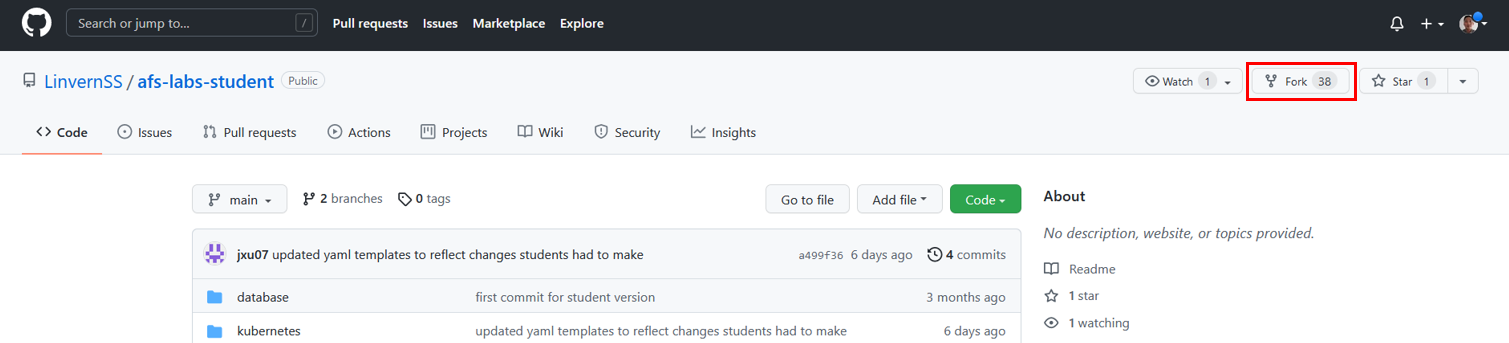
</figure>

4. Login to your EC2 and enter your lab environment container via VSCode
  > **Note:** VSCode will remember your most recent window opened. If you closed VSCode while working inside your container, VSCode will automatically attempt to reconnect to your container when you reopen VSCode (you'll be asked to enter your password again).
  > 
  > Otherwise, you can reconnect to your container with VSCode under "File" → "Open Recent" → "root/dso-bootcamp-home \[Container\]".
  >
  > If none of the above works, then follow the steps below.

  a. Open a new VSCode window
  
  b. Under "Remote Explorer", select "SSH Targets" from the drop-down menu

  c. Click on your EC2's IP address to SSH into

  d. Under "Remote Explorer", select "Containers" from the drop-down menu

  e. Click on "Refresh" to see a list of running containers

  f. Right-click on "lab-env:latest" and "Attach to Container" to enter your lab environment


5.	Clone your GitHub repository (that you just forked) into your container by completing the following steps:

  a.	First, click the green “Code” button on the GitHub repository
  
  b.	Copy the repository URL shown by clicking on the button to the right of it

 > **Tip:** Make sure you're cloning with the _HTTPS_
 >
 > The URL should be something like `https://github.com/<YOUR GITHUB USERNAME>/afs-labs-student.git`

<figure>
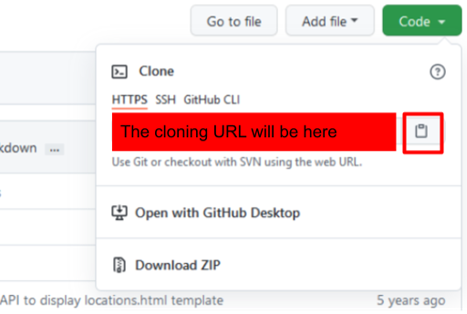
</figure>

<ul>
  c. Run the following command in your VSCode terminal to clone your repository to your container:

  ```
  git clone <YOUR REPOSITORY URL>
  ```

  </ul>

<figure>
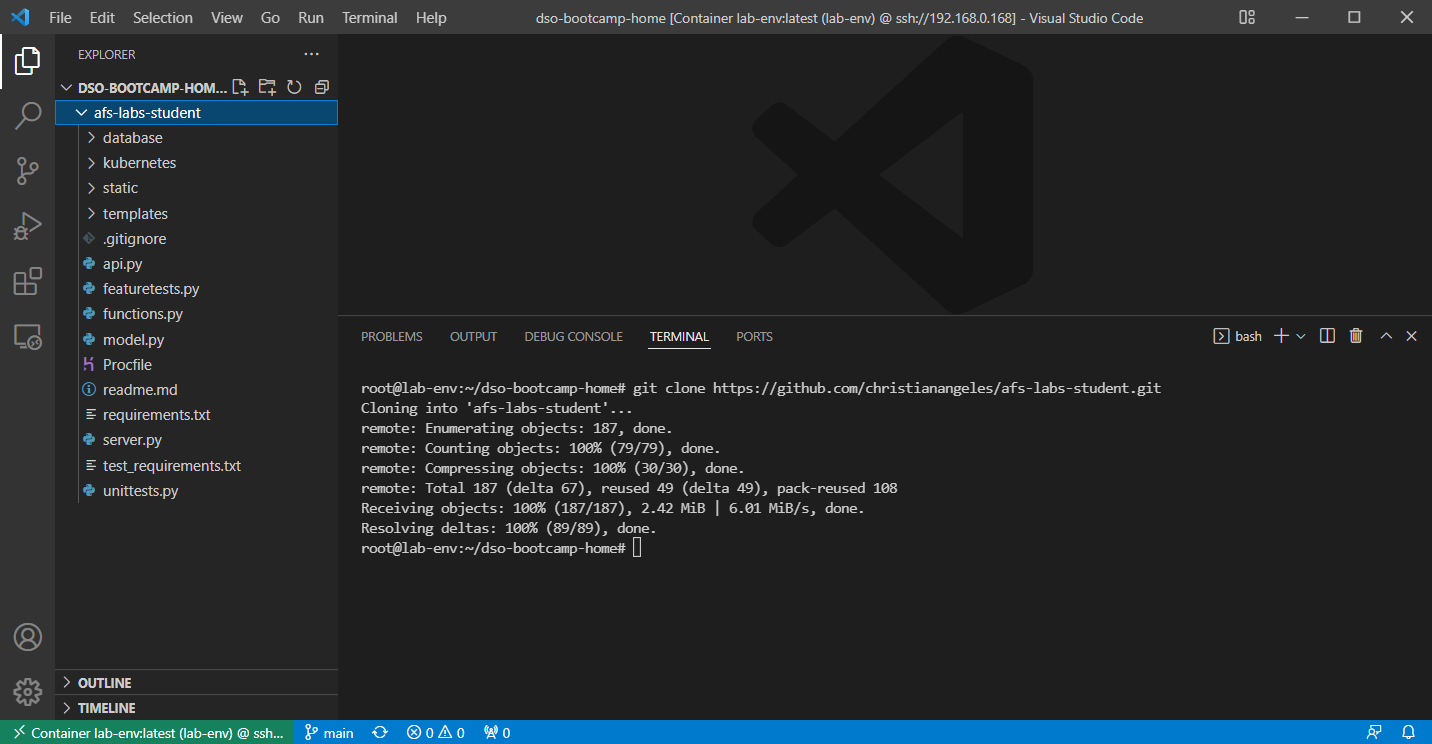
</figure>

## Create a Pipeline Repository

1.	On https://github.com/, create a new repository by clicking on the green “New” button in the top left corner

<figure>
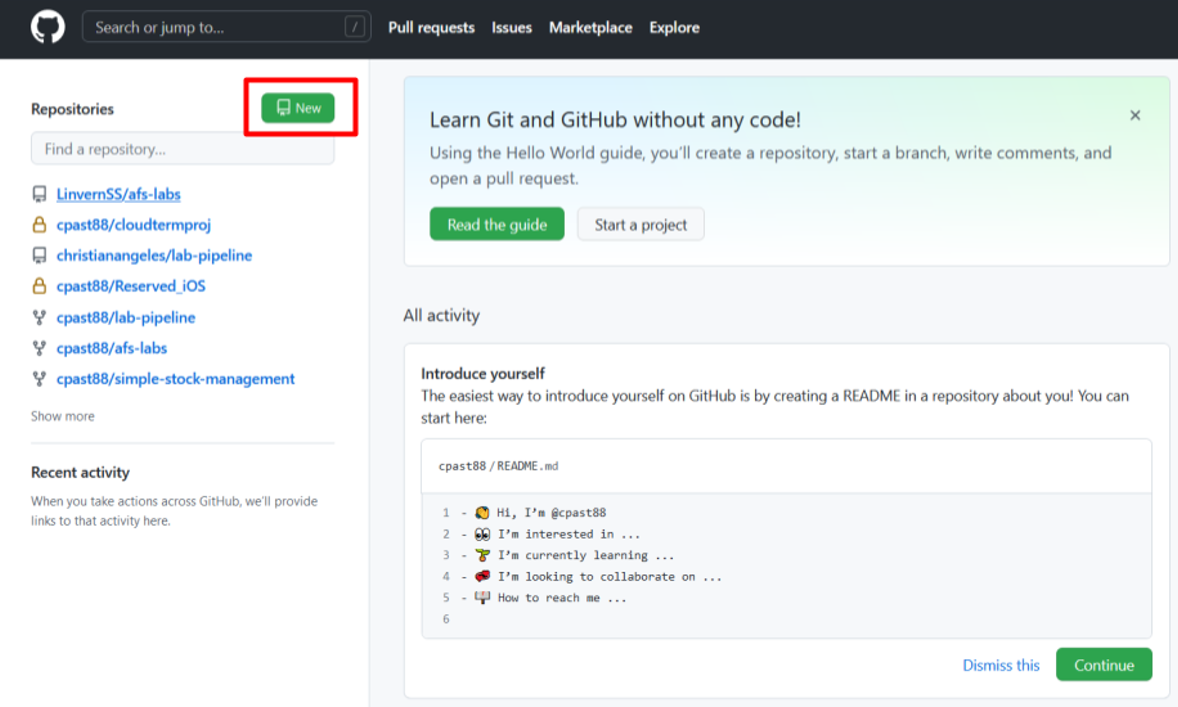
</figure>

2.	Name the new repository “devops-camp-pipeline” 

  a. Make sure "Public" and "Add a README file" are selected


<figure>
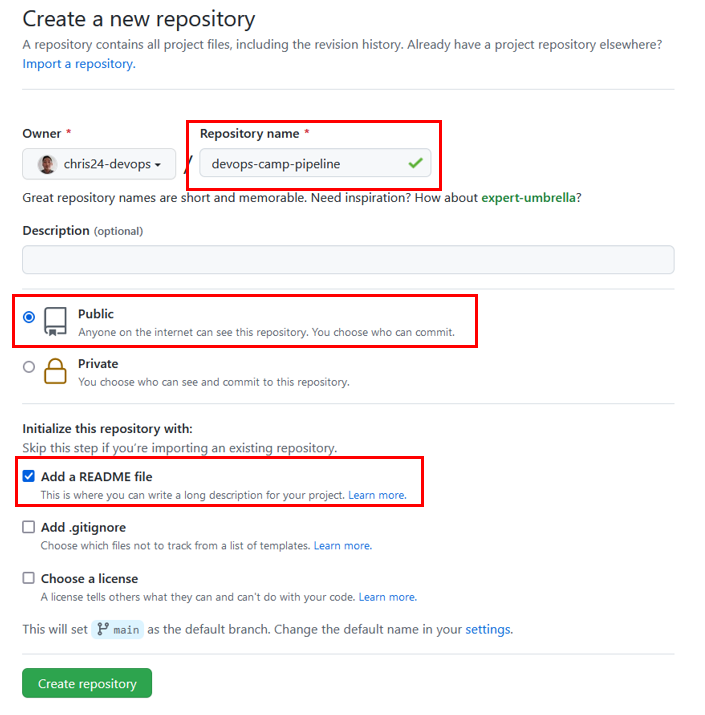
</figure>

3.	Click “Create repository” to complete the process

4. Once you’ve created the repository, you should be shown a screen that looks like the one below; click on the highlighted buttons to copy the repository URL

<figure>
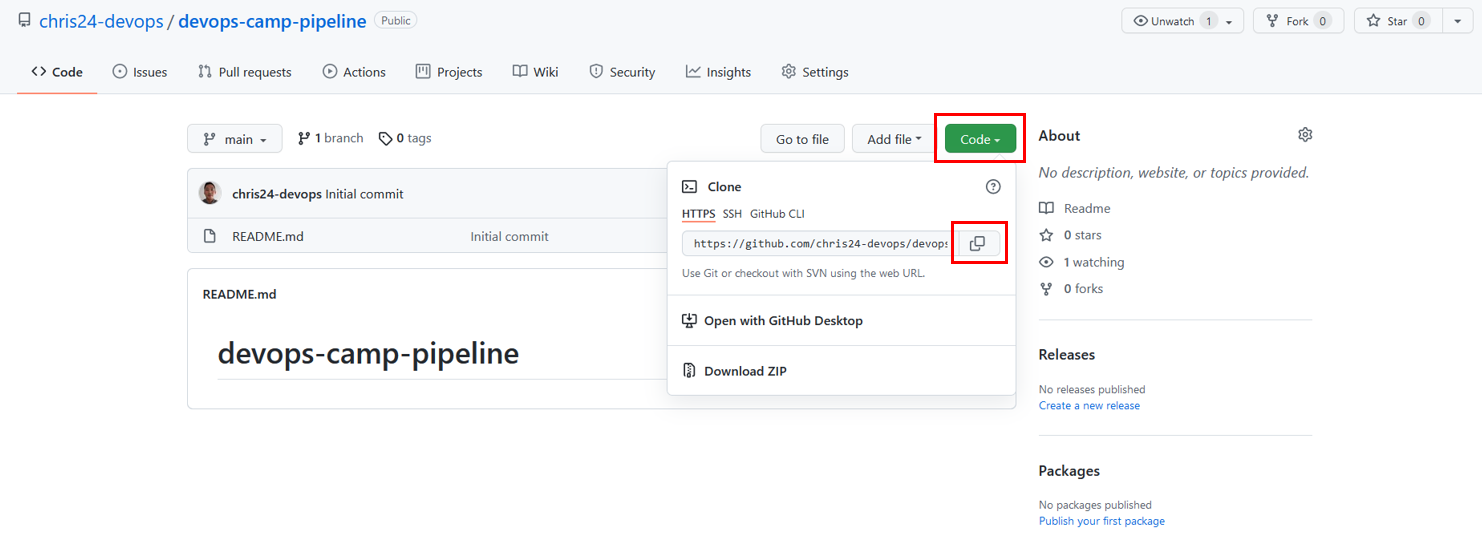
</figure>

5. In VSCode, clone your new repository into your container by running the following command in the terminal:

  ```
  git clone <URL>
  ```

 > **Note:** If you get a warning about cloning an empty repository, you can ignore it.

7. Create a Jenkinsfile for your pipeline

  a. Under "Explorer", right-click on the `devops-camp-pipeline` folder and select "New File"

  b. Name the new file `devops-camp-jenkinsfile`


<figure>
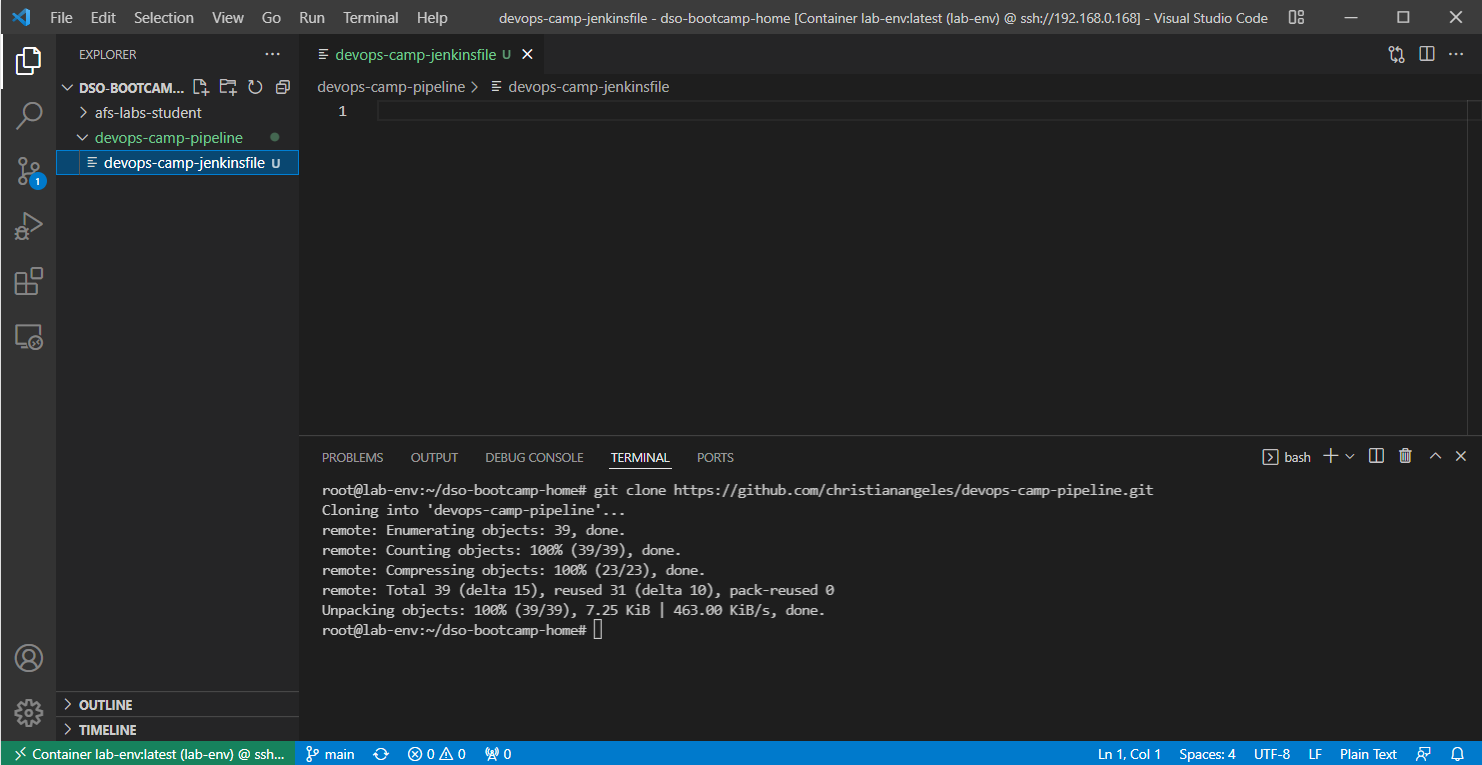
</figure>

## Create and Configure a Jenkins Pipeline

1.	Navigate to your Jenkins environment: https://jenkins.dev.afsmtddso.com/

 a. Login with the credentials that were already provided

2.	Create a new pipeline by clicking on "New Item"

<figure>
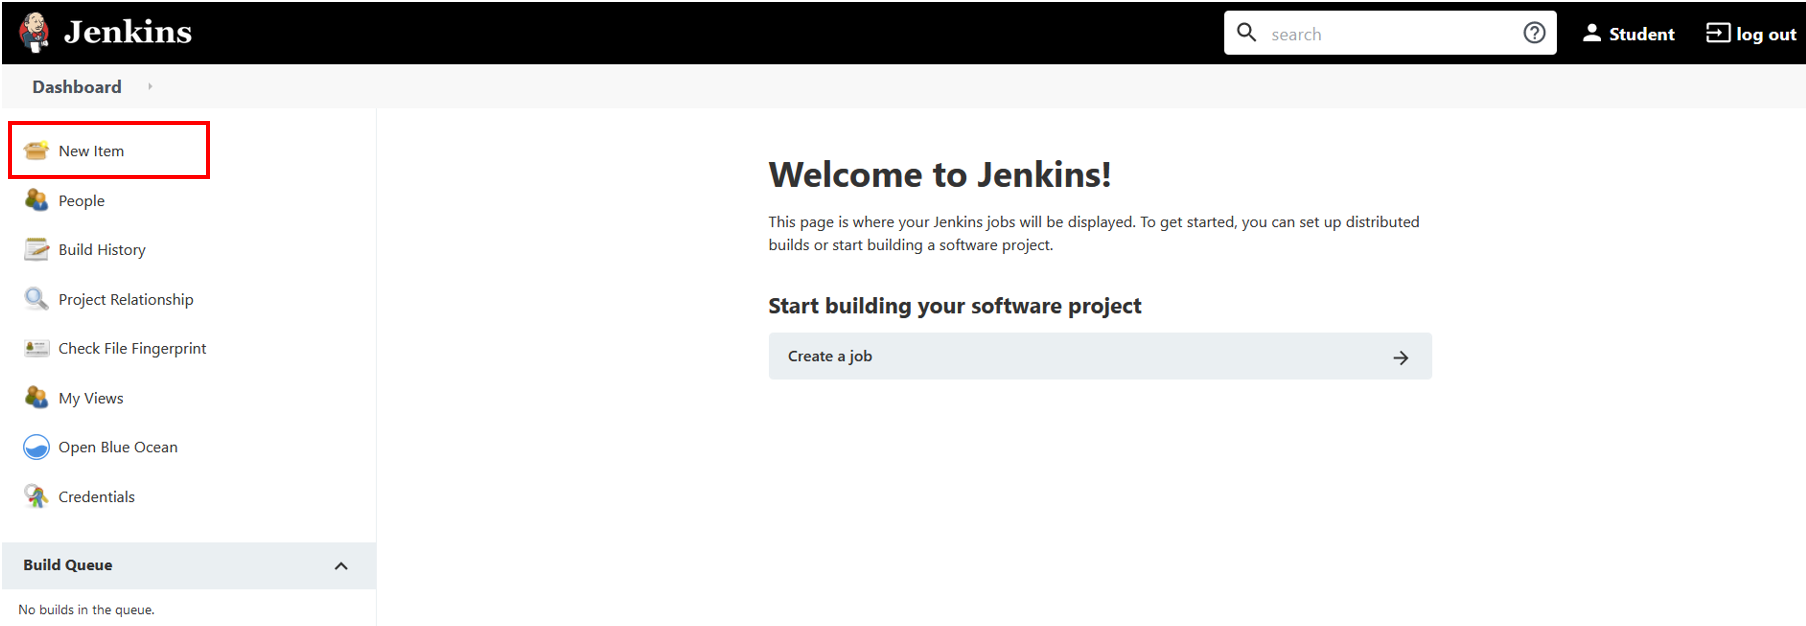
</figure>

3.	You should now see a screen with options for your new item

  a.	Name your new item `<YOUR FIRST INITIAL + LAST NAME>-app-pipeline`

  b.	Select "Pipeline" as the type of project

  c.	Press "OK" to proceed

<figure>
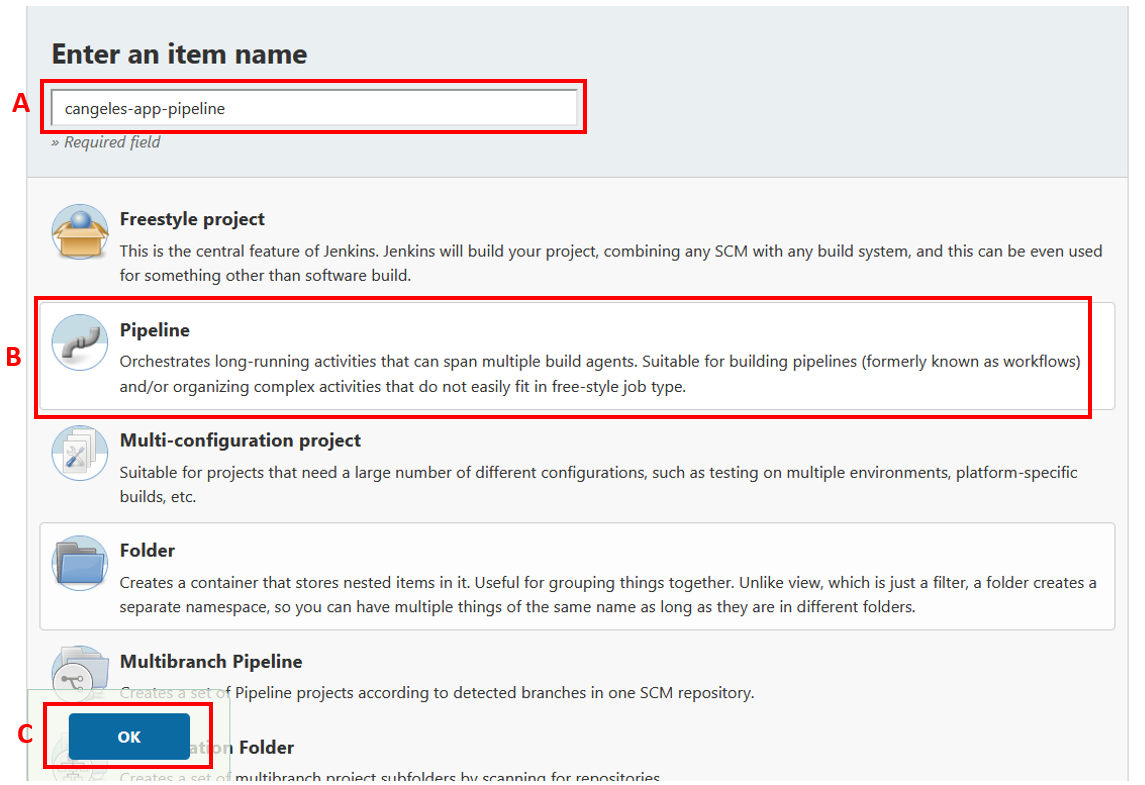
</figure>

4. You should now see a screen with configuration options to enable

  a. “Project-based security” will be enabled by default, leave the settings as is

<figure>
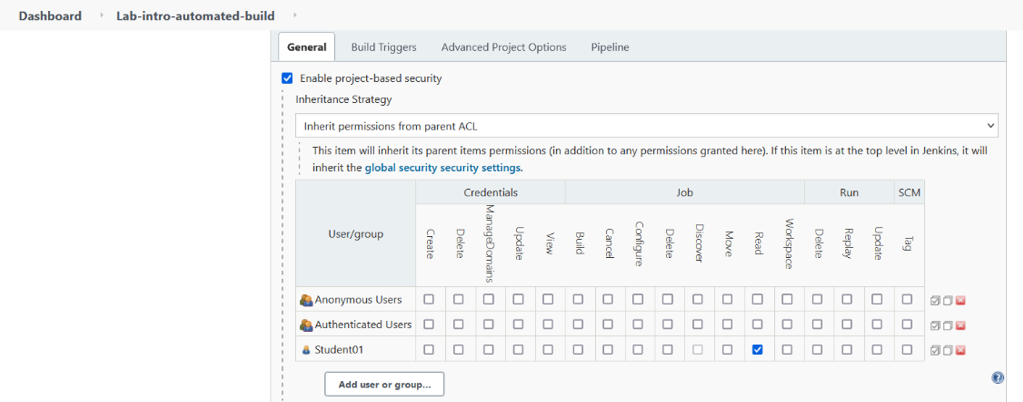
</figure>


<ul>
b. A little bit underneath that, make sure "GitHub Project" is checked

c. In the input box below "Github Project," paste in the GitHub URL of your `devops-camp-pipeline` repository

d. Scroll down to the subsection "Build Triggers" and check "GitHub hook trigger for GITScm polling"
</ul>

<figure>
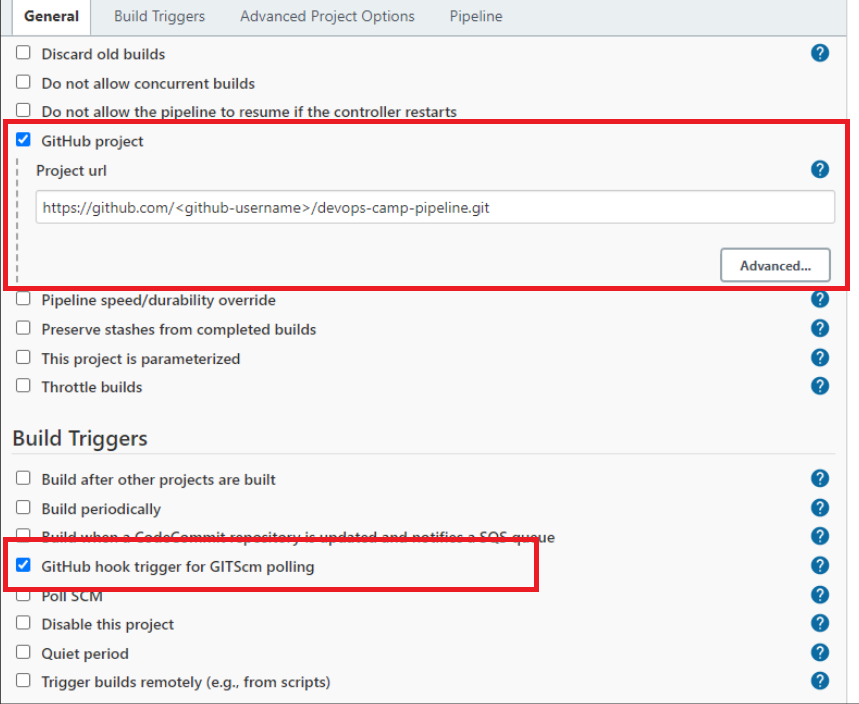
</figure>

5. Select the "Pipeline" tab and configure for your SCM (Source Code Management)

<ul>
a. Under "Definition," click "Pipeline script" to open the dropdown menu
<ul>
i. Select “Pipeline script from SCM”

ii. In the SCM dropdown menu, select "Git"

iii. In the "Repositories" section, add your `devops-camp-pipeline` repository URL
</ul>
b. On "Branches to build," make sure you put your main branch

> **Tip:** This branch could be called either `main` or `master`, check your repository to see what yours is called by looking here:
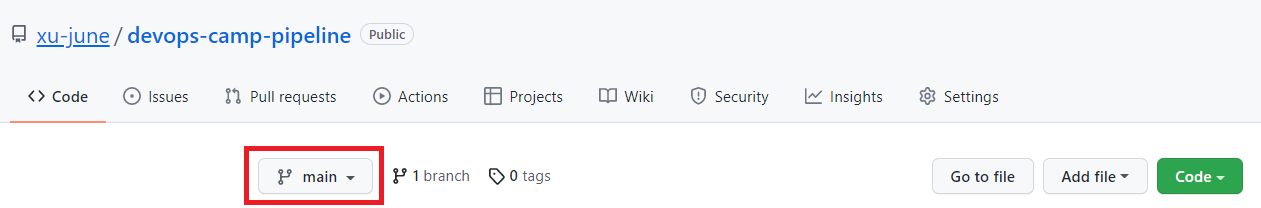

</ul>

<figure>
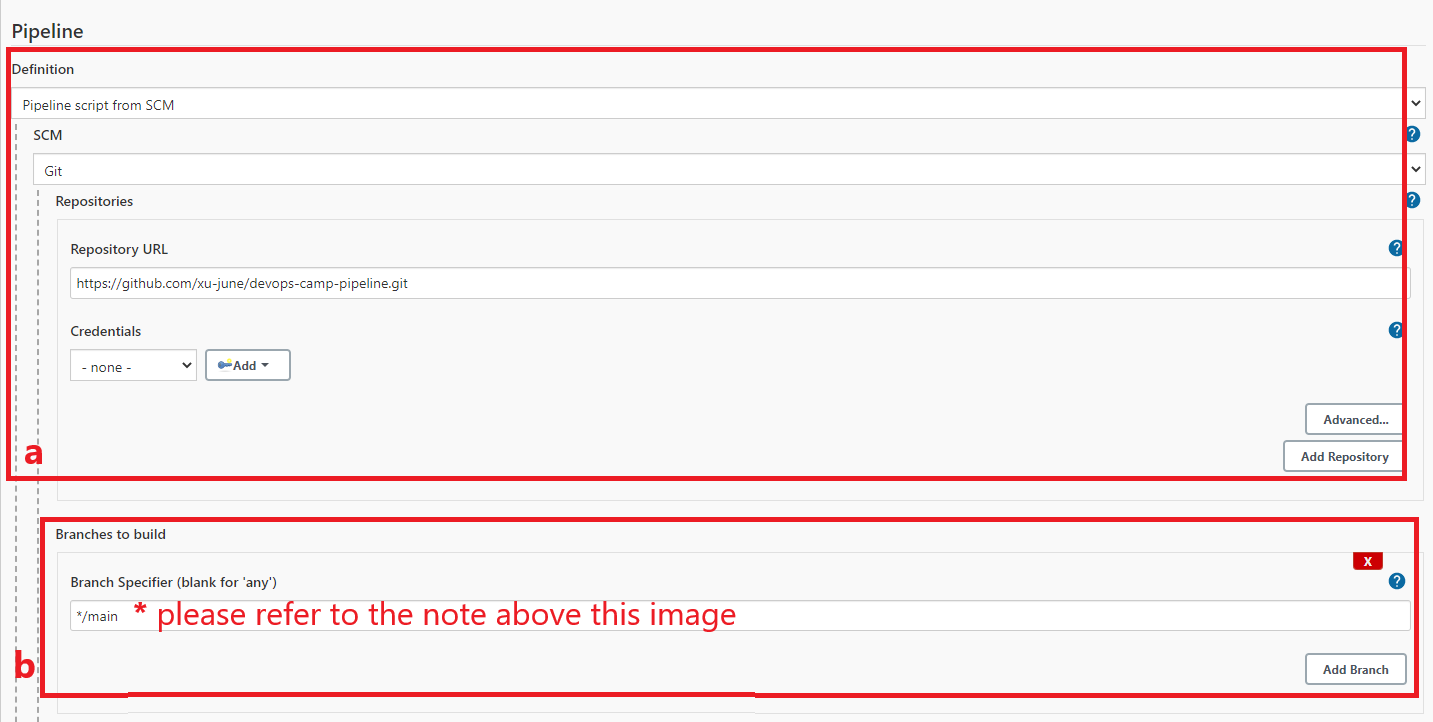
</figure>

6.	Scroll to the bottom of the options and look for "Script Path"

  a.	In the Script Path, change the default value `Jenkinsfile` to `devops-camp-jenkinsfile`

 > **Note:** By default, Jenkins will look for a file named “Jenkinsfile” to build the pipeline with. Since ours is named something different, we must specify it in the "Script Path".

<figure>
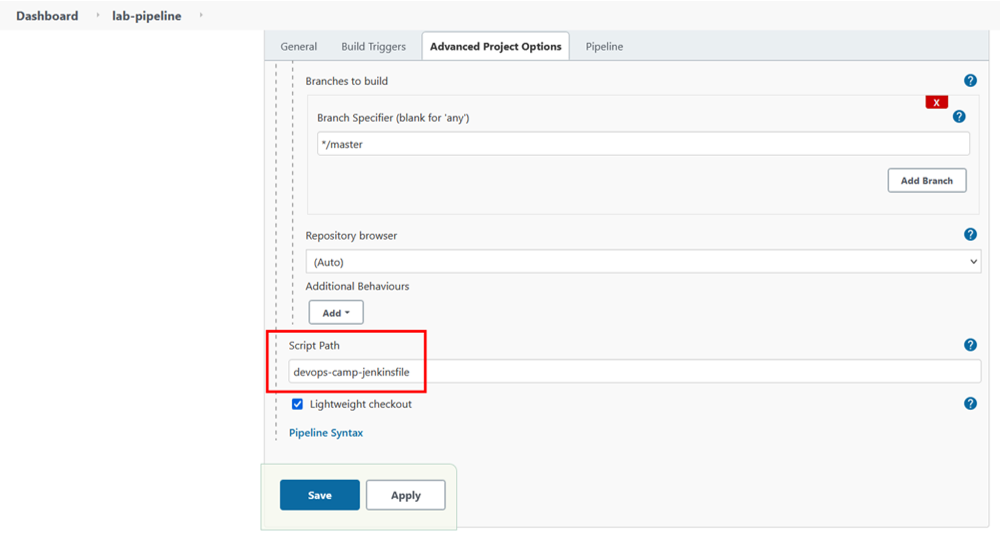
</figure>

7.	Click the “Save” button at the bottom of the page to create the pipeline

## Create Jenkins API Token

API tokens will allow one of your GitHub webhooks to authenticate with the Jenkins server and send notifications to trigger a pipeline build. Follow the instructions below to generate an API token for your Jenkins account.

1. On the drop-down menu of your account name, click on “Configure”

<figure>
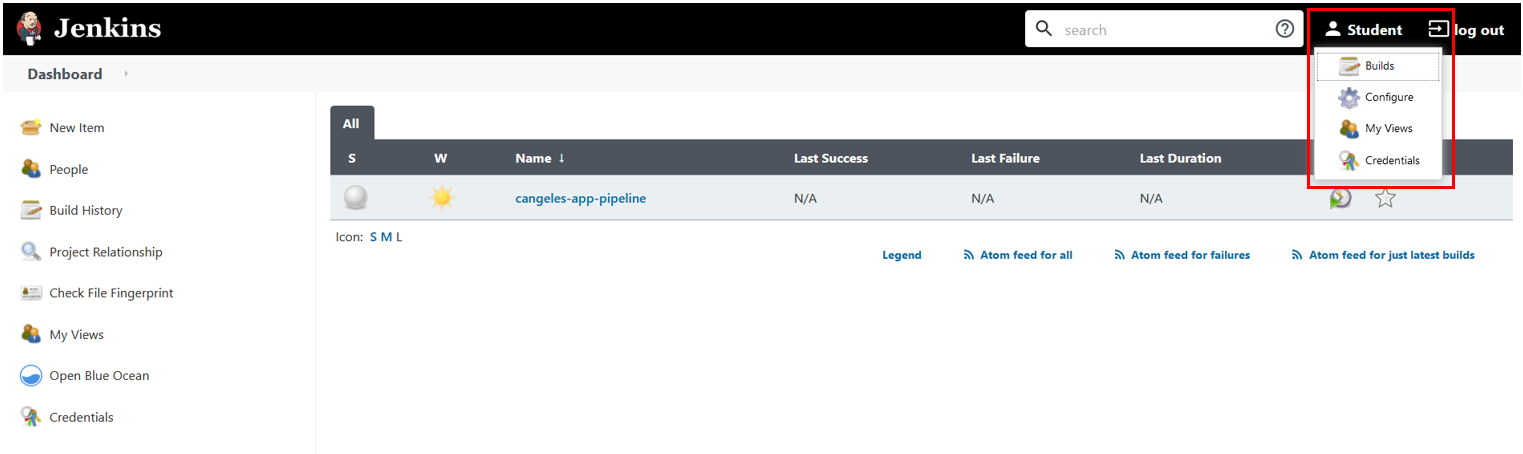
</figure>

2.	Within the API Token section, click on “Add new Token”

3.	Name your token `devops-camp-token` and click on “Generate”

<figure>
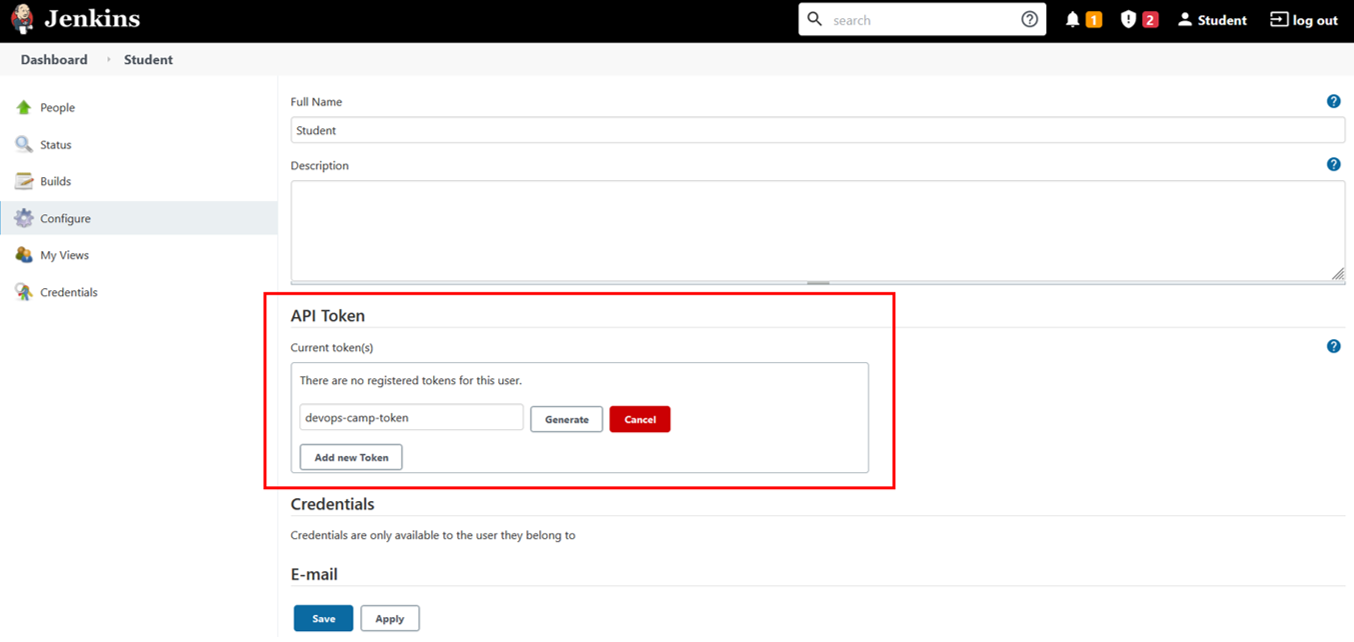
</figure>

4. Copy the generated token

<figure>
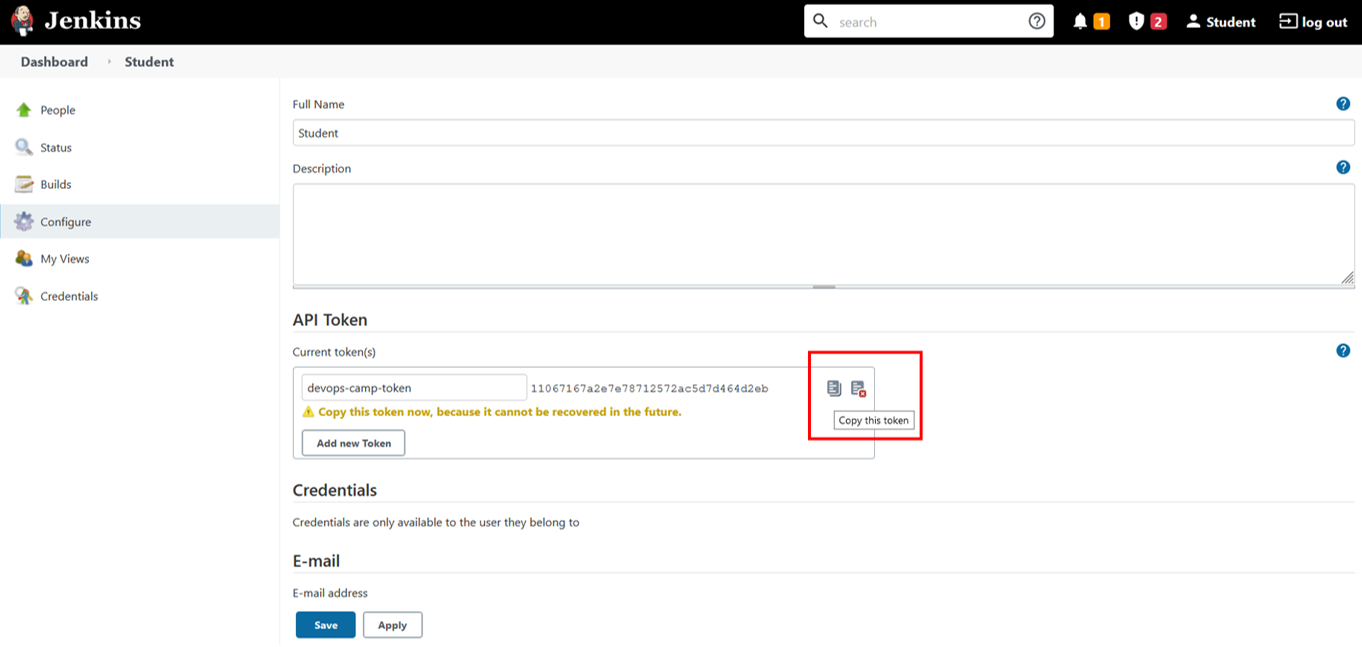
</figure>

<ul>

> **Tip:** _Paste this token into the cheat sheet we provided for you_, because it will be used as part of the "Payload URL" of a GitHub webhook.

</ul>

5. Click on the “Save” button at the bottom of the page once you’ve copied your token


## Create GitHub Webhooks

Webhooks will automate our build process by sending notifications to the Jenkins server when commit changes are pushed to your GitHub repositories. You can learn more from: https://plugins.jenkins.io/github/

In this section, you will create two webhooks&#8212;one for the `devops-camp-pipeline` repository and the other for the `afs-labs-student` repository.

1. Navigate to your `devops-camp-pipeline` repository on the GitHub website and follow the instructions below to add a webhook

<ul>
a. Under Settings → Webhooks
<ul>i. Click on “Add webhook”</ul>
</ul>

<figure>
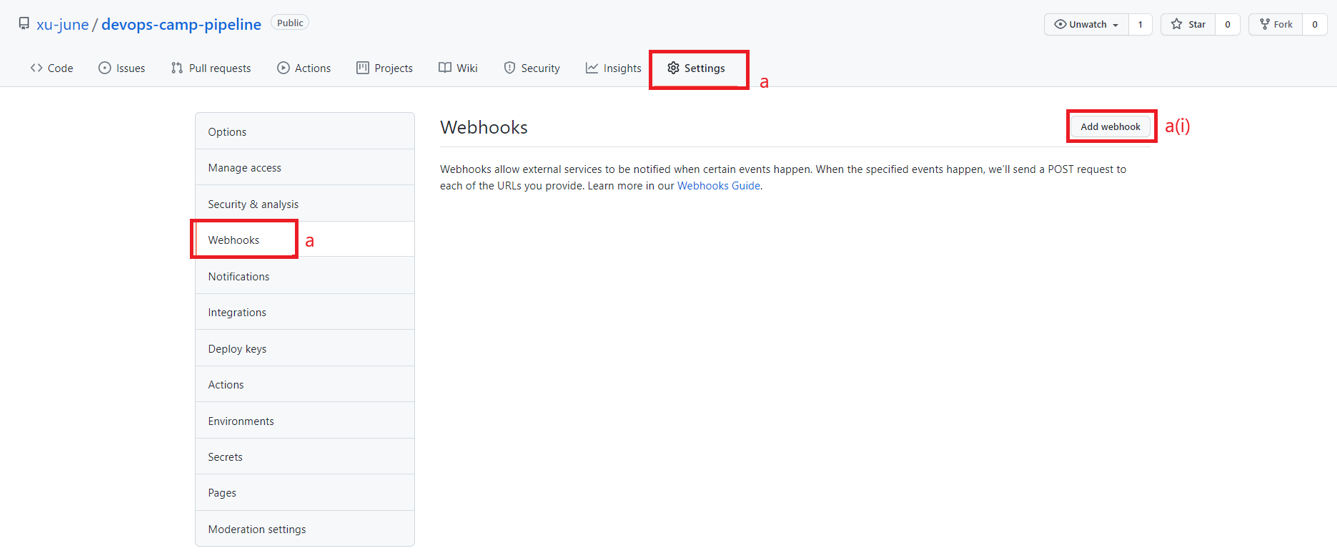
</figure>

<ul>

b. Change the “Content type” to “application/json”
  
c. For the “Payload URL,” paste your Jenkins server URL followed by “github-webhook/”; it should be:
```
https://jenkins.dev.afsmtddso.com/github-webhook/
```
</ul>

<figure>
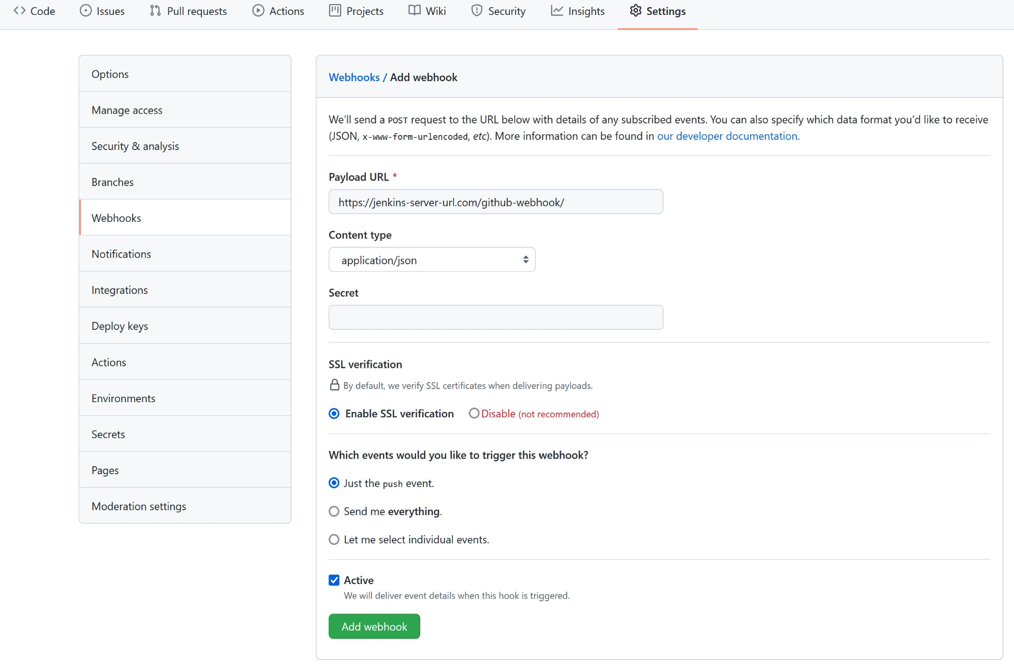
</figure>

<ul> 
d.	Click “Add webhook” to create this webhook
</ul>

2.	Navigate to your GitHub `afs-labs-student` repository

  a.	Under Settings → Webhooks, click on “Add webhook”

  b.	In the “Payload URL” box, paste in the following URL filled in with your information:
```
https://<JENKINS USERNAME>:<API TOKEN>@jenkins.dev.afsmtddso.com/job/<JENKINS PIPELINE NAME>/build/
```

  > **Tip:** Your API token is the token that you created and saved in the previous section, "Create Jenkins API Token". Your Jenkins pipeline name should be `<YOUR FIRST INITIAL + LAST NAME>-app-pipeline`

<ul>
  c.	Make sure the “Content type” is "application/json"

  d.	Click on “Add webhook” to create the webhook

  e. Refresh the page and if you see a green check mark next to a link, you have successfully created your webhook.

 </ul>


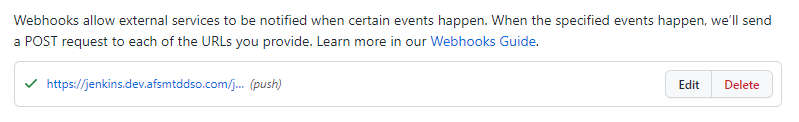


<ul>

> **Explanation**
>
> The `devops-camp-pipeline` webhook is simple because you have already linked that repository to your Jenkins pipeline. In contrast, you need to need to specify the API token and pipeline name for the `afs-labs-student` webhook because this link has not already been established and so you have to tell this information exactly where to go.

> **Note:** You can learn more about Jenkins API from: https://www.jenkins.io/doc/book/using/remote-access-api/

</ul>

## Test Pipeline

In the previous section, you configured a Jenkins pipeline to monitor changes to a source code repository (GitHub) and created a webhook to trigger an automated build when changes are made to the web application or the pipeline itself.

In this section, you will create a Jenkinsfile that contains the definition of how your pipeline will run. You can learn more about Jenkins Pipelines from: https://www.jenkins.io/doc/book/pipeline/

1.	In VSCode, open your `devops-camp-jenkinsfile`

  a. Copy and paste the template below to your `devops-camp-jenkinsfile`

  b. _Replace_ the section `<YOUR GITHUB REPOSITORY URL>`, with your `afs-labs-student` GitHub URL

 > **Tip:** _Make sure to include_ the `.git` portion of the URL.

  c. Save the changes you made to the `devops-camp-jenkinsfile`

In [ ]:
pipeline {
    agent {
        label 'jenkins-agent'
    }
    //TODO("Lab 4 - Artifact Management"): add environment variables
    stages {
        stage('Application repository') {
            steps {
                echo "Cloning application repository"
                //TODO("Lab 3 - Introduction to Automated Builds"): add github url
                sh 'git clone <YOUR GITHUB REPOSITORY URL>'
                //TODO("Lab 4 - Artifact Management"): add COMMIT_HASH variable
            }
        }
        stage('Application docker build') {
            steps {
                echo "Building application image"
                //TODO("Lab 4 - Artifact Management"): build the docker app image
            }
            //TODO("Lab 4 - Artifact Management"): clean local docker app image
        }
        stage('Database docker build') {
            steps {
                echo "Building database image"
                //TODO("Lab 4 - Artifact Management"): build the docker db image
            }
            //TODO("Lab 4 - Artifact Management"): clean local docker db image
        }
        //TODO("Lab 7 - Automated Security Scans"): add a stage
        stage('Deploy') {
            steps {
                echo "Deployment stage"
                //TODO("Lab 5 - Deploy to EKS"): deploy docker images
            }
        }
    }
    post {
        cleanup {
            echo "Clean workspace"
            sh 'rm -rf .git ./*'
        }
    }
}

2.	In the VSCode terminal, within your lab environment container, navigate to your `devops-camp-pipeline` folder
  ```
  cd devops-camp-pipeline
  ```

3. Configure your GitHub account in your "lab-env" container. 

  a. You can do this by running the following commands in your terminal
  ```
  git config --global user.name "<YOUR GITHUB USERNAME>"
  ```
  ```
  git config --global user.email <YOUR EMAIL>
  ```
  ```
  git config credential.helper store
  ```

  > **Note:** The credential helper will store your GitHub PAT so you won't have to re-enter it every time you fetch or push to your repository.

4.	Commit and push your changes

  a. You’ll need to add your file to git by running `git add devops-camp-jenkinsfile`

  b. Run `git commit -m "updated jenkinsfile"` to commit to your changes.



<figure>
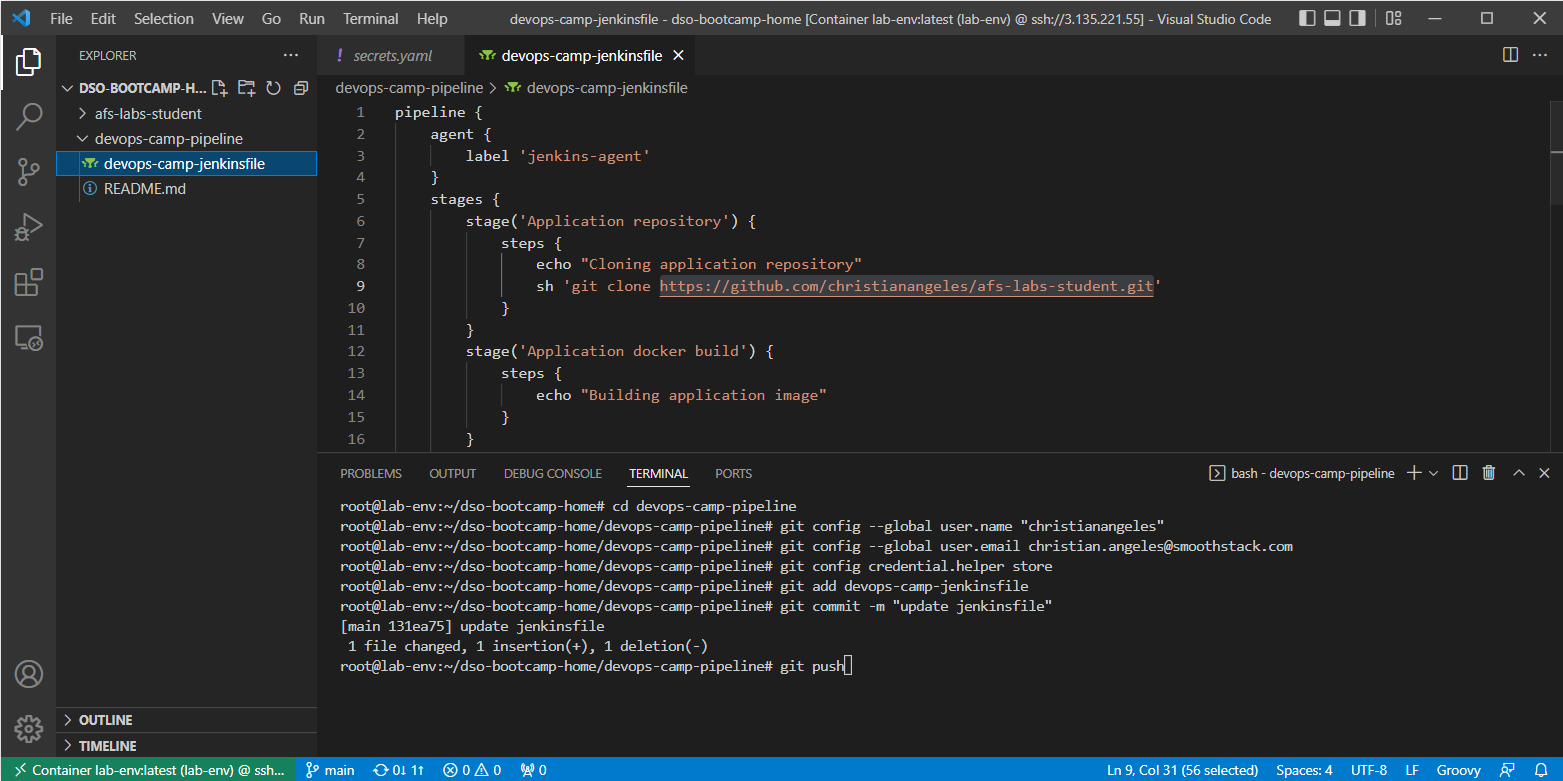
</figure>

<ul>

  c. Run `git push` in order to sync changes from your local repository over to the remote repository

  > **Tip:** You’ll either be prompted to enter your GitHub PAT again or authorize VS Code for additional permissions.

</ul>

<figure>
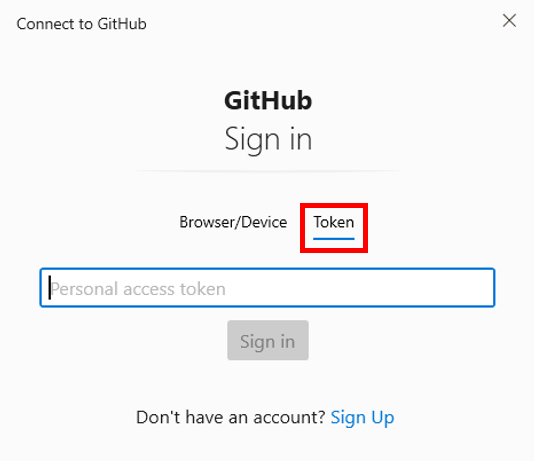
</figure>

<figure>
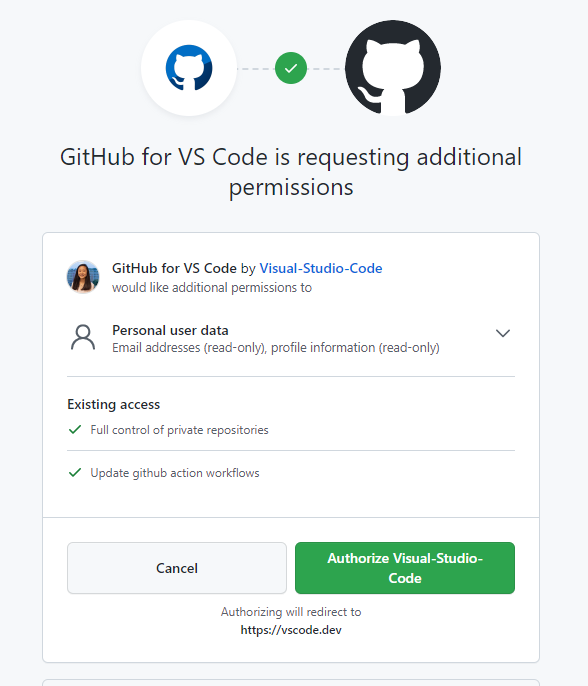
</figure>

5. Navigate back to your Jenkins pipeline and check the "Status" tab

<figure>
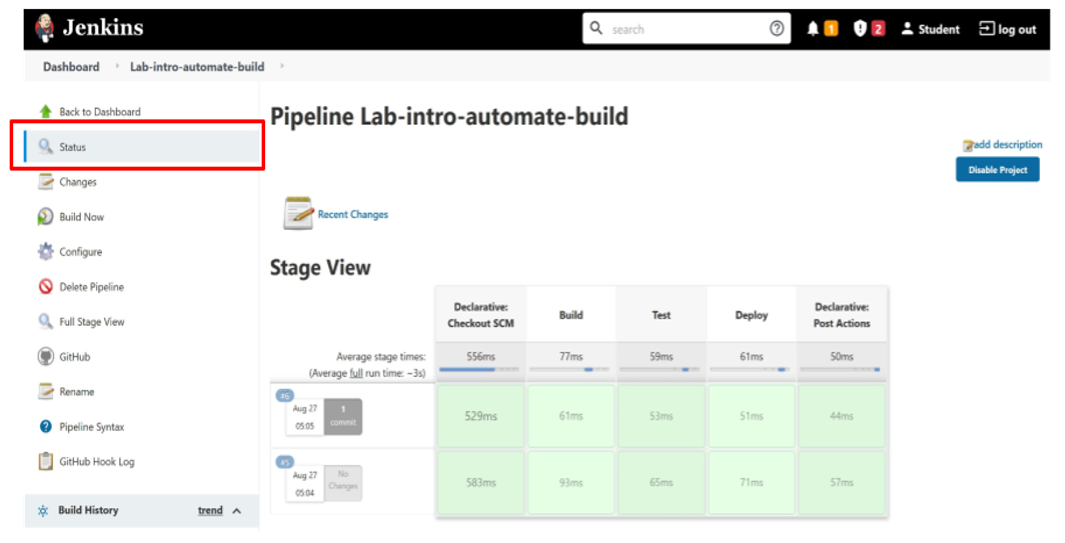
</figure>

<ul>

a.	If you don't already see a build in progress, you'll need to click on "Build Now" to manually trigger your pipeline build.

> **Note:** Earlier instructions had you create GitHub Webhooks to trigger automated builds for your `devops-camp-pipeline` repository. However, Jenkins will require you to build your first pipeline manually for the build-trigger option (i.e., "GitHub hook trigger for GITScm polling") to work.

</ul>

## You're done if...

If you see green boxes under all the columns, you're done! 